In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
baba_short_data = yf.download("TM", period="1mo", interval="2m")

[*********************100%***********************]  1 of 1 completed


In [3]:
baba_short_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM,TM
Datetime,,,,,,
2024-12-16 14:30:00+00:00,174.529999,174.529999,174.574997,174.309998,174.570007,12023
2024-12-16 14:32:00+00:00,174.654999,174.654999,174.654999,174.490005,174.490005,1654
2024-12-16 14:34:00+00:00,174.199997,174.199997,174.440002,174.199997,174.399994,2241
2024-12-16 14:36:00+00:00,174.110001,174.110001,174.550003,174.039993,174.389999,6611
2024-12-16 14:38:00+00:00,174.259995,174.259995,174.274994,174.240005,174.240005,2641


In [4]:
baba_short_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM,TM
Datetime,,,,,,
2025-01-15 16:16:00+00:00,185.029999,185.029999,185.029999,184.920105,184.920105,964
2025-01-15 16:18:00+00:00,185.080002,185.080002,185.080002,185.009995,185.009995,450
2025-01-15 16:20:00+00:00,184.949997,184.949997,184.949997,184.949997,184.949997,605
2025-01-15 16:22:00+00:00,185.190002,185.190002,185.190002,185.009995,185.080002,2039
2025-01-15 16:24:00+00:00,185.115005,185.115005,185.115005,185.115005,185.115005,0


In [5]:
baba_short_data.shape

(3373, 6)

In [6]:
baba_short_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3373 entries, 2024-12-16 14:30:00+00:00 to 2025-01-15 16:24:00+00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Adj Close, TM)  3373 non-null   float64
 1   (Close, TM)      3373 non-null   float64
 2   (High, TM)       3373 non-null   float64
 3   (Low, TM)        3373 non-null   float64
 4   (Open, TM)       3373 non-null   float64
 5   (Volume, TM)     3373 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 184.5 KB


In [7]:
# check for the missing values
baba_short_data.isnull().sum()

,,0
Price,Ticker,
Adj Close,TM,0
Close,TM,0
High,TM,0
Low,TM,0
Open,TM,0
Volume,TM,0


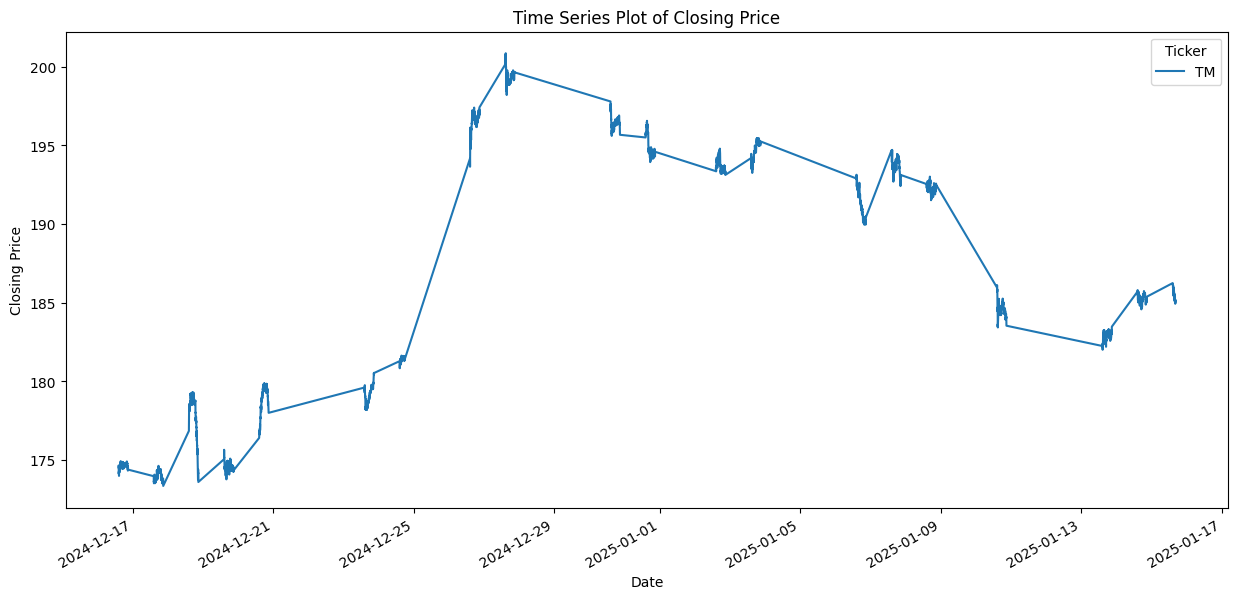

In [8]:
# time series plot
baba_short_data['Close'].plot(figsize=(15,7))
plt.title('Time Series Plot of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

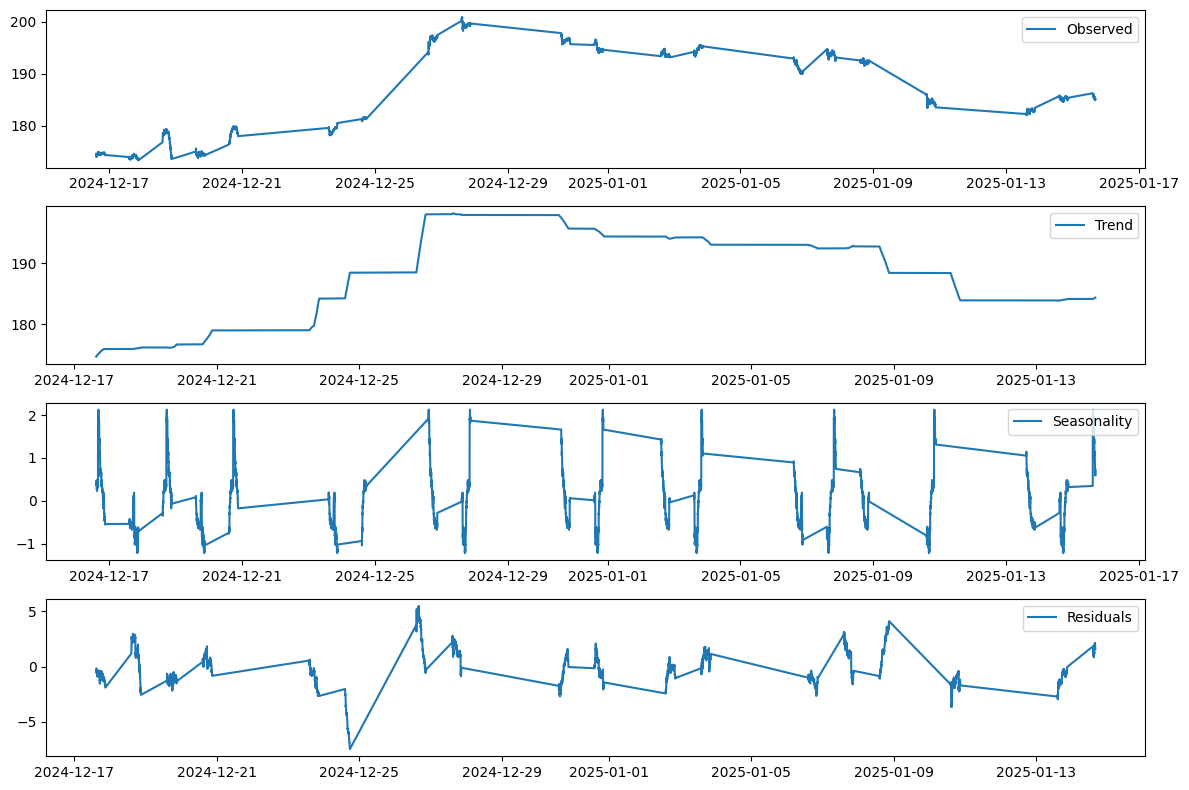

In [9]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(baba_short_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

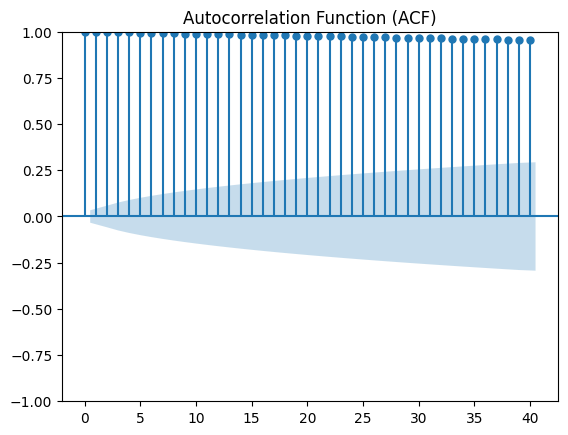

In [10]:
plt.figure(figsize=(10, 5))
plot_acf(baba_short_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

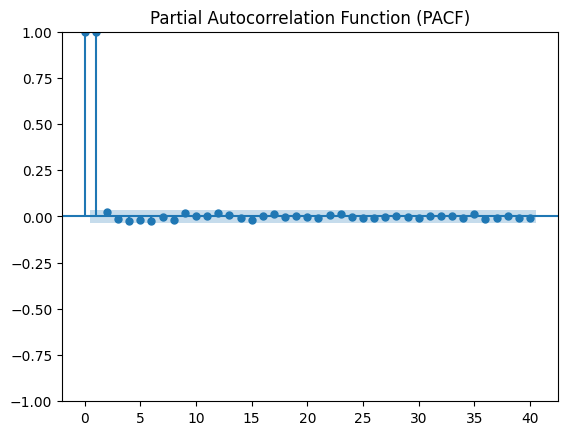

In [11]:
plt.figure(figsize=(10, 5))
plot_pacf(baba_short_data['Close'], lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [12]:
# get the Date out of the index
baba_short_data.reset_index(inplace=True)

In [13]:
baba_short_data

Price,Datetime,Adj Close,Close,High,Low,Open,Volume
Ticker,,TM,TM,TM,TM,TM,TM
0,2024-12-16 14:30:00+00:00,174.529999,174.529999,174.574997,174.309998,174.570007,12023
1,2024-12-16 14:32:00+00:00,174.654999,174.654999,174.654999,174.490005,174.490005,1654
2,2024-12-16 14:34:00+00:00,174.199997,174.199997,174.440002,174.199997,174.399994,2241
3,2024-12-16 14:36:00+00:00,174.110001,174.110001,174.550003,174.039993,174.389999,6611
4,2024-12-16 14:38:00+00:00,174.259995,174.259995,174.274994,174.240005,174.240005,2641
...,...,...,...,...,...,...,...
3368,2025-01-15 16:16:00+00:00,185.029999,185.029999,185.029999,184.920105,184.920105,964
3369,2025-01-15 16:18:00+00:00,185.080002,185.080002,185.080002,185.009995,185.009995,450
3370,2025-01-15 16:20:00+00:00,184.949997,184.949997,184.949997,184.949997,184.949997,605


In [14]:
# isolet the Date and Sales columns
baba_short_data = baba_short_data[['Datetime', 'Close']]

In [15]:
baba_short_data

Price,Datetime,Close
Ticker,,TM
0,2024-12-16 14:30:00+00:00,174.529999
1,2024-12-16 14:32:00+00:00,174.654999
2,2024-12-16 14:34:00+00:00,174.199997
3,2024-12-16 14:36:00+00:00,174.110001
4,2024-12-16 14:38:00+00:00,174.259995
...,...,...
3368,2025-01-15 16:16:00+00:00,185.029999
3369,2025-01-15 16:18:00+00:00,185.080002
3370,2025-01-15 16:20:00+00:00,184.949997


In [16]:
# Split into training and testing sets based on index
train_size = int(len(baba_short_data) * 0.8)  # 80% for training
train_data = baba_short_data[:train_size]
test_data = baba_short_data[train_size:]

In [17]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [18]:
train_data

Price,Close
Ticker,TM
Datetime,
2024-12-16 14:30:00+00:00,174.529999
2024-12-16 14:32:00+00:00,174.654999
2024-12-16 14:34:00+00:00,174.199997
2024-12-16 14:36:00+00:00,174.110001
2024-12-16 14:38:00+00:00,174.259995
...,...
2025-01-08 16:38:00+00:00,192.820877
2025-01-08 16:40:00+00:00,193.020004


In [19]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2024-12-16 14:30:00+0000', tz='UTC'),
 Timestamp('2025-01-08 16:46:00+0000', tz='UTC'))

In [20]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2025-01-08 16:48:00+0000', tz='UTC'),
 Timestamp('2025-01-15 16:24:00+0000', tz='UTC'))

In [21]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close']])

In [22]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [23]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [24]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1842
Epoch 2/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 9.4755e-04
Epoch 3/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 5.0296e-04
Epoch 4/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 6.6896e-04
Epoch 5/5
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 4.5406e-04
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
19.787740468978882


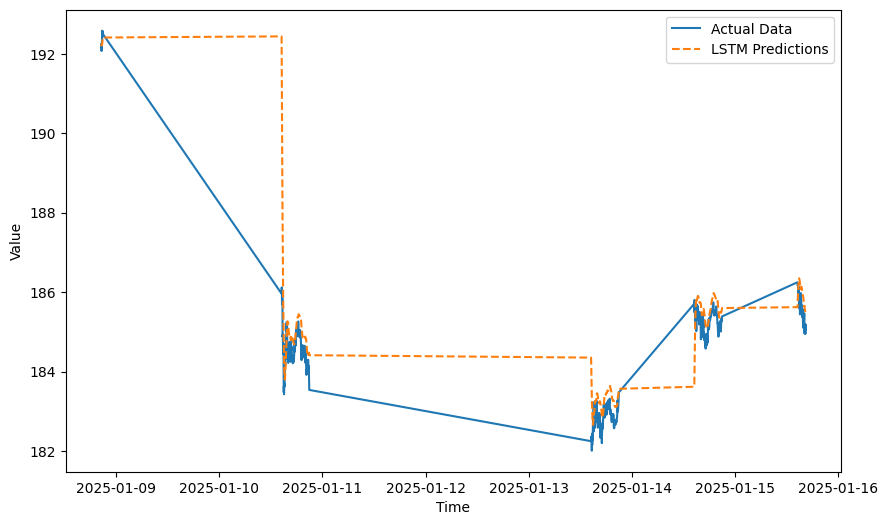

In [25]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [26]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

0.257154430975248


In [27]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

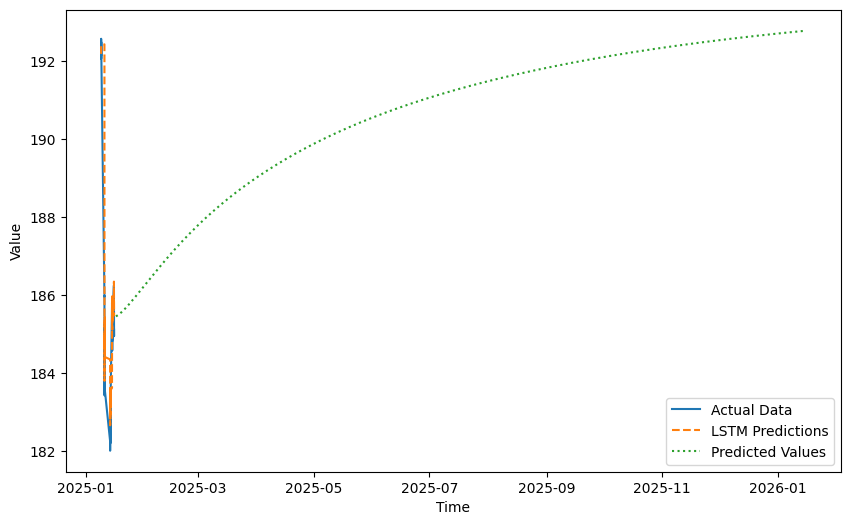

In [28]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()